In [7]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from modules import *

In [10]:

import scipy.interpolate as interpolate

# load data
filedir = './data/r14p1_reduced/'

filepath = glob.glob(filedir + '*_PH.npy')[0]
ph = np.load(filepath)[::8,:52]/(1000*3.41) # adjusting for different ls output in wrfout and auxhist9

filepath = glob.glob(filedir + '*_P.npy')[0]
p = np.load(filepath)[::8,:52] # adjusting for different ls output in wrfout and auxhist9

filepath = glob.glob(filedir + '*_CL_AM.npy')[0]
cl_am = np.load(filepath).mean(axis=3)

filepath = glob.glob(filedir + '*_CL_PM.npy')[0]
print (filepath)
cl_pm = np.load(filepath).mean(axis=3)

filepath = glob.glob(filedir + '*_LS.npy')[0]
ls = np.load(filepath)[7::8] # adjusting for different ls output in wrfout and auxhist9

print (ph.shape, p.shape, cl_am.shape)
# selecting the first year
cl_am = martians_year(ls, cl_am)
cl_pm = martians_year(ls, cl_pm)
ph = martians_year(ls, ph)
p = martians_year(ls, p)
ls = martians_year(ls,ls)
print (ph.shape, p.shape, cl_am.shape)

dcladp = np.zeros_like(cl_am)
dpdz = np.zeros_like(cl_am)
dclpdp = np.zeros_like(cl_pm)
print('Calculating residual mean circulation ...')
# calculation of tau per km
for i in tqdm(np.arange(cl_am.shape[0])):
    for j in np.arange(cl_am.shape[2]):
        tst2 = interpolate.UnivariateSpline(ph[i,:,j], cl_am[i,:,j], k=2, s=0)
        dcladp[i,:,j] = tst2(ph[i,:,j], 1)

        tst = interpolate.UnivariateSpline(ph[i,:,j], cl_pm[i,:,j], k=2, s=0)
        dclpdp[i,:,j] = tst(ph[i,:,j], 1)

# dividing into month
zonal_ph = martians_month(ls, ph)
zonal_p = martians_month(ls, p)
zonal_cl_am = martians_month(ls, dcladp )
zonal_cl_pm = martians_month(ls, dclpdp )


./data/r14p1_reduced/wrfout_TAU_CL_PM.npy
(750,) (350,)
(750, 52, 36) (750, 52, 36) (750, 52, 36)
[ 62 731] 2
[ 62 731] 2
[ 62 731] 2
[ 62 731] 2
[ 62 731] 2
(669, 52, 36) (669, 52, 36) (669, 52, 36)
Calculating residual mean circulation ...


100%|██████████| 669/669 [00:01<00:00, 581.74it/s]


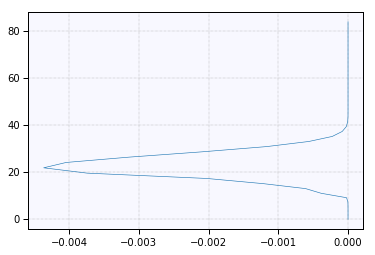

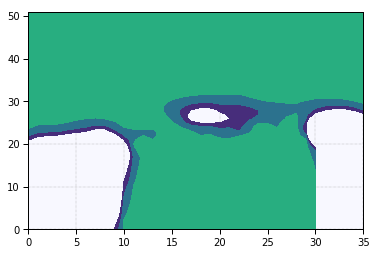

In [11]:
#### test not important ####

sl =[90,slice(None),18]
#plot(cl_am[sl],ph[sl])
#ylim(650,1) ; yscale('log')
plot(diff(cl_pm[sl])/diff(ph[sl]),convolve(ph[sl],[0.5,0.5],'valid'))
ic = interpolate.CubicSpline
#plot(ic(ph[sl],cl_pm[sl], bc_type='not-a-knot')(ph[sl],1),ph[sl])
#plot(dclpdp[sl],ph[sl])
#xlim(-1e-5,1e-5)
figure()
w=(ls>30)&(ls<60)
#plot(dclpdp[w,:,18].mean(axis=0),ph[w,:,18].mean(axis=0));
#plot(zonal_cl_pm[1,:,18],zonal_ph[1,:,18],ls=':')
#xlim(-1e-5,1e-5)
contourf(zonal_cl_pm[1],levels=arange(-0.0025,0.0025,0.001))

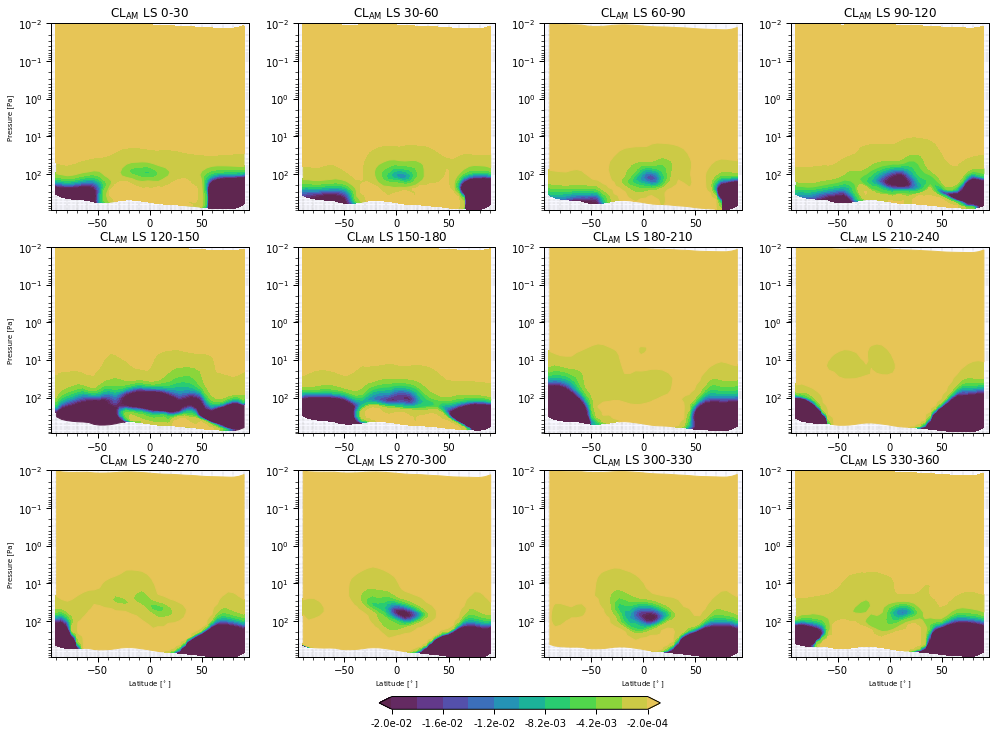

In [19]:

# sns.set_style("whitegrid")
zonal_plt_monthly(zonal_p, [0,30], zonal_cl_am, 'CL$_{\mathrm{AM}}$', linspace(-2.02e-2,-2e-4,11), norm=False, cmap=cb)
# zonal_plt_monthly(zonal_p, ls, zonal_cl_pm, 'CL$_{\mathrm{PM}}$', linspace(-2.02e-2,-2e-4,11), norm=False, cmap=cmap)

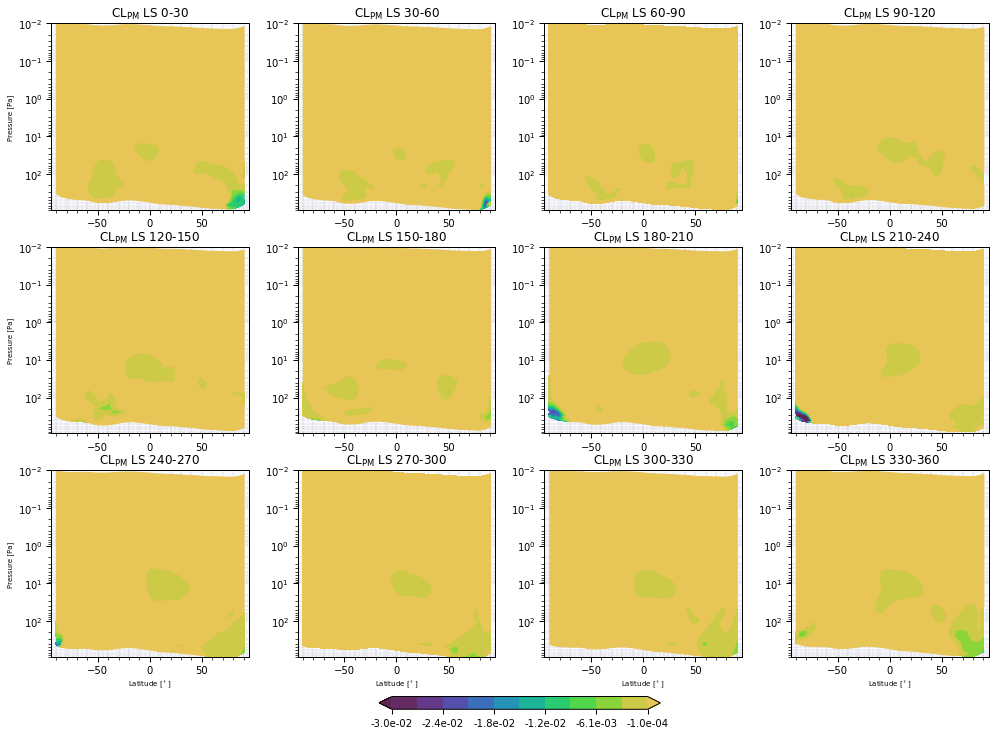

In [20]:
zonal_plt_monthly(zonal_p, [0,30], (zonal_cl_pm-zonal_cl_am)/2., 'CL$_{\mathrm{PM}}$',linspace(-3.01e-2,-1e-4,11), norm=False, cmap=cb)